In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Churn.csv to Bank_Churn.csv


## Data Preprocessing

### After reading the data and investigating, I found this data has no null values and shape is 14 variables with 10000 instances. Except Gender Geography and surnames all variables are numeric. although variables are numeric but further investigation and understanding explains there are many categorical variables. To get the unique values of these categorical variables, I ran codes and got the below results.

In [125]:
import pandas as pd 
import io 
  
df = pd.read_csv(io.BytesIO(uploaded['Bank_Churn.csv'])) 
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
print(df.shape)
df.describe()

(10000, 14)


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
for col in cat_var:
  print(df[col].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[ 2  1  8  7  4  6  3 10  5  9  0]
[1 3 2 4]
[1 0]
[1 0]


In [5]:
cat_var=df[["Geography", "Gender", "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember"]]
cont=df[["CreditScore", "Age", "Balance", "EstimatedSalary"]]

In [ ]:
m.info()
print(df.CreditScore.min())
print(df.CreditScore.max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          10000 non-null  object
 1   HasCrCard       10000 non-null  object
 2   IsActiveMember  10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB
350
850


## Exploratory Data Analysis

### Before going further, I categorized credit score as below and made a new variable 'Credit_ScoreGroup'. For understanding the multicollinearity between variables, I used heatmap for numeric variables and found there is no multicollinearity.


In [126]:
category=pd.cut(df.CreditScore,bins=[300,500, 600,700,780,850],labels=["Very Poor", "Poor", "Fair", "Good", "Excellent"])
df.insert(5,'Credit_ScoreGroup',category)

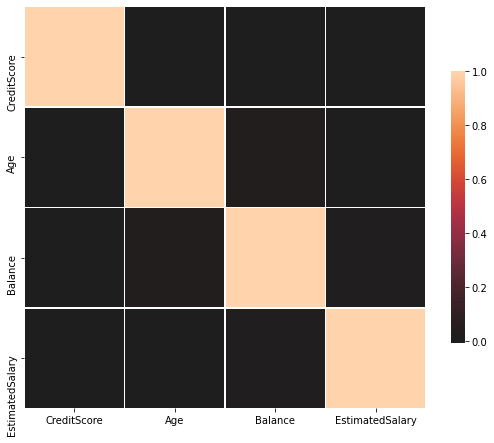

In [ ]:
corr = cont.corr() # correlations
plt.figure(figsize=(9, 10))
sns.heatmap(corr, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### In below, histogram plot of various continuous variable we can see that these are not normally distributed. 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


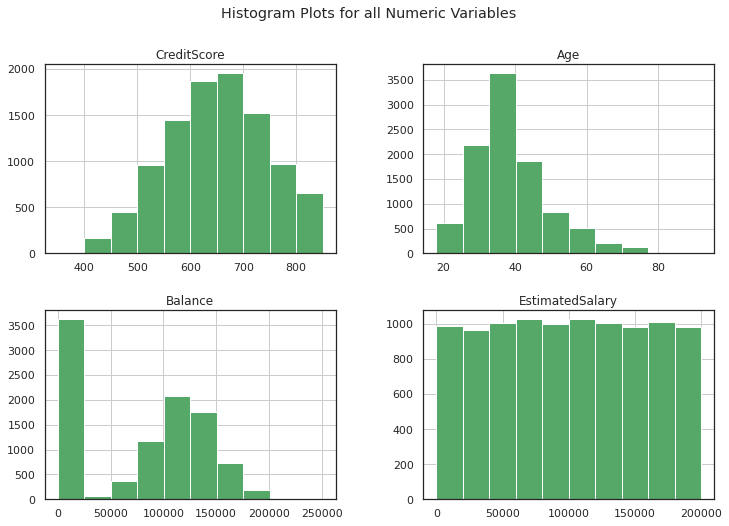

In [124]:
fig = plt.figure(figsize = (12,8))
ax = fig.gca()
cont.hist(ax=ax, color='g')

fig.suptitle("Histogram Plots for all Numeric Variables")
plt.show();

### As our dependent variable is categorical 'Exited' with 0 means not exited and 1 means exited. Below I got plots for different categorical variables with differentiation from exited or not exited. In geography variable, France has many accounts than Spain and Germany. Female exited more that Male although they have less number of accounts. Likewise, not active members exited more than active members. It's interesting to see that bank has many customers with fair credit score whereas the customers with product 1 has exited most.


Text(0.5, 0.98, 'Frequency Distribution of Different Categorical Variable')

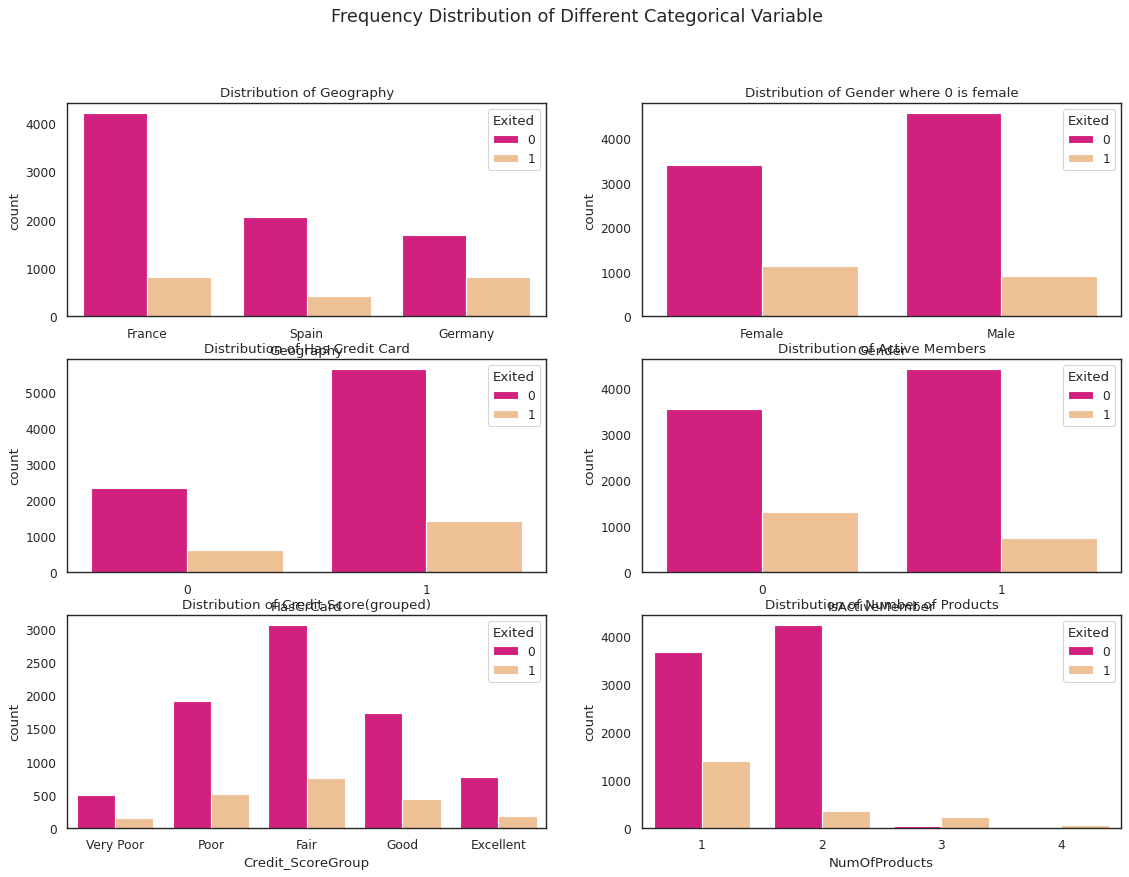

In [129]:
import itertools
fig, axarr = plt.subplots(3, 2, figsize=(17,12), dpi=80, facecolor='w', edgecolor='k')
sns.set(style="white")
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0], palette="Accent_r")
axarr[0][0].set_title('Distribution of Geography')
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1], palette="Accent_r")
axarr[0][1].set_title('Distribution of Gender where 0 is female')
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0], palette="Accent_r")
axarr[1][0].set_title('Distribution of Has Credit Card')
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1], palette="Accent_r")
axarr[1][1].set_title('Distribution of Active Members')
sns.countplot(x='Credit_ScoreGroup', hue = 'Exited',data = df, ax=axarr[2][0], palette="Accent_r")
axarr[2][0].set_title('Distribution of Credit Score(grouped)')
sns.countplot(x='NumOfProducts', hue='Exited', data=df, ax=axarr[2][1], palette="Accent_r")
axarr[2][1].set_title('Distribution of Number of Products')
fig.suptitle('Frequency Distribution of Different Categorical Variable', fontsize=16)

### Below is the box plot for continuous variables, I normalized these variables in different dataframe to better understand the boxplot. I didn't remove any outlier as I found that these outliers showing older population and excellent score customers, so thought to keep for further analysis.


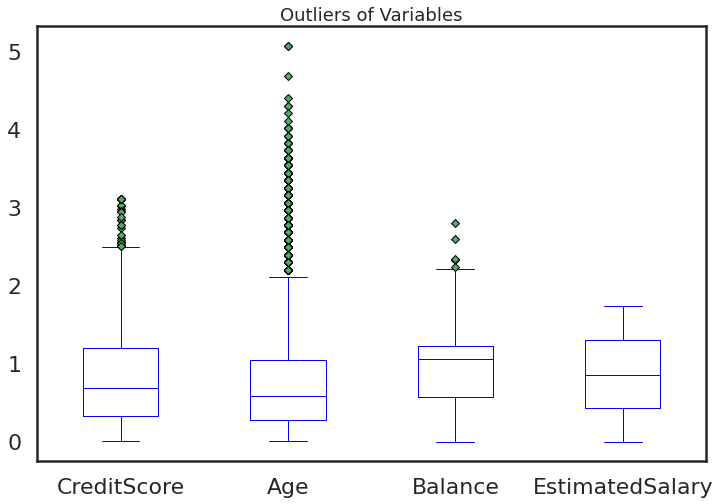

In [ ]:
import numpy as np
column_mean = cont. mean()
column_std=cont.std()
normalized_df = np.abs((cont-column_mean) / (column_std))
normalized_df.head(5)
green_diamond = dict(markerfacecolor='g', marker='D')
boxplot2 = normalized_df.boxplot(figsize=(12,8), grid=False, flierprops=green_diamond, color='blue')
plt.title('Outliers of Variables', fontsize=18);

### To categorize in numeric the categorical variable that were of dtype object, I used below codes. I also checked dtypes after this and now except Surname all are numeric.


In [7]:
df.Gender=df.Gender.astype("category").cat.codes
df.Geography=df.Geography.astype("category").cat.codes
#df.Credit_ScoreGroup=df.Credit_ScoreGroup.astype("category").cat.codes#

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   Surname            10000 non-null  object 
 3   CreditScore        10000 non-null  int64  
 4   Geography          10000 non-null  int8   
 5   Credit_ScoreGroup  10000 non-null  int8   
 6   Gender             10000 non-null  int8   
 7   Age                10000 non-null  int64  
 8   Tenure             10000 non-null  int64  
 9   Balance            10000 non-null  float64
 10  NumOfProducts      10000 non-null  int64  
 11  HasCrCard          10000 non-null  int64  
 12  IsActiveMember     10000 non-null  int64  
 13  EstimatedSalary    10000 non-null  float64
 14  Exited             10000 non-null  int64  
dtypes: float64(2), int64(9), int8(3), object(1)
memory usage: 966.9+ KB


In [9]:
df1=df.drop(['Credit_ScoreGroup'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int8   
 5   Gender           10000 non-null  int8   
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), int8(2), object(1)
memory usage: 957.2+ KB


### I divided the independent and dependent variables in X and y. After this using columntransfer I only used OneHotEncoder for Geography variable. As other categorical variables are either just have 0 and 1 values or the variables are ordinal.


In [10]:
X=df1.iloc[:,3:13].values
y=df1.iloc[:,-1].values

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
c = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X=np.array(c.fit_transform(X))


In [ ]:
import sys
import numpy
#numpy.set_printoptions(threshold=sys.maxsize)
#print(X)

### After splitting the data in training and test data set, I used minmaxscaler in ordinal and continuous variable as below. 

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=0)

In [14]:
from sklearn.preprocessing import MinMaxScaler
c = ColumnTransformer(transformers=[('num', MinMaxScaler(), [3,5,6,7,8,11])], remainder='passthrough')
    
X_train=np.array(c.fit_transform(X_train))
X_test=np.array(c.fit_transform(X_test))

## Neural Networking

### Here I used neural networking for the classification purpose. I used below libraries. Sequential groups a linear stack of layers into a model. In the first model, I used two hidden layers and ReLU activation function whereas for output layer I used sigmoid as I am doing binomial classification. For optimizer, I used adam as adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. The cross-entropy computes the cross-entropy loss between true labels and predicted labels. The batch size is a number of samples processed before the model is updated. The number of epochs is the number of complete passes through the training dataset. The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset. Although model converged very quickly still I started with 100 epochs and in different models reduced it further. After changing hyperparameters(including different activation function and optimization algorithm), different models were made. Although accuracy is almost same in all the models.


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout
import tensorflow as tf


In [ ]:
ann = Sequential()
ann.add(Dense(units=8, input_dim=12, activation='relu'))
ann.add(Dense(units=8, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

In [ ]:
 
ann.compile(optimizer = 'adam', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
an=ann.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
750/750 [==============================] - 1s 802us/step - loss: 0.5121 - accuracy: 0.7881
Epoch 2/100
750/750 [==============================] - 1s 843us/step - loss: 0.4788 - accuracy: 0.7963
Epoch 3/100
750/750 [==============================] - 1s 831us/step - loss: 0.4667 - accuracy: 0.7963
Epoch 4/100
750/750 [==============================] - 1s 823us/step - loss: 0.4568 - accuracy: 0.7975
Epoch 5/100
750/750 [==============================] - 1s 816us/step - loss: 0.4430 - accuracy: 0.8071
Epoch 6/100
750/750 [==============================] - 1s 820us/step - loss: 0.4316 - accuracy: 0.8133
Epoch 7/100
750/750 [==============================] - 1s 816us/step - loss: 0.4259 - accuracy: 0.8165
Epoch 8/100
750/750 [==============================] - 1s 803us/step - loss: 0.4222 - accuracy: 0.8188
Epoch 9/100
750/750 [==============================] - 1s 827us/step - loss: 0.4173 - accuracy: 0.8240
Epoch 10/100
750/750 [==============================] - 1s 823us/step - l

## Second Model
### Changed the optimizer to SGD.

In [ ]:
ann.compile(optimizer = 'SGD', loss='mse', metrics='accuracy')

In [ ]:
an_gd=ann.fit(X_train, y_train, batch_size=10, epochs=20, validation_data=(X_test,y_test))

Epoch 1/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0993 - accuracy: 0.8703 - val_loss: 0.1025 - val_accuracy: 0.8588
Epoch 2/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0992 - accuracy: 0.8701 - val_loss: 0.1033 - val_accuracy: 0.8588
Epoch 3/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0992 - accuracy: 0.8687 - val_loss: 0.1036 - val_accuracy: 0.8568
Epoch 4/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0993 - accuracy: 0.8683 - val_loss: 0.1046 - val_accuracy: 0.8608
Epoch 5/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0991 - accuracy: 0.8673 - val_loss: 0.1028 - val_accuracy: 0.8588
Epoch 6/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0989 - accuracy: 0.8695 - val_loss: 0.1038 - val_accuracy: 0.8620
Epoch 7/20
750/750 [==============================] - 1s 1ms/step - loss: 0.0992 - accuracy: 0.8683 - val_loss: 0.1041 - val_accuracy: 0.8600
Epoch 

## Third Model




In [ ]:
sgd=tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.0, nesterov=False, name='SGD')

In [ ]:
ann.compile(optimizer = 'sgd', loss='mse', metrics='accuracy')

In [ ]:
ann_g=ann.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 0.8659
Epoch 2/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 0.8675
Epoch 3/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.8676
Epoch 4/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.8672
Epoch 5/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 0.8656
Epoch 6/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.8665
Epoch 7/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 0.8661
Epoch 8/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1009 - accuracy: 0.8665
Epoch 9/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 0.8663
Epoch 10/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.8668

In [ ]:
ann_g.params

{'epochs': 50, 'steps': 235, 'verbose': 1}

# Fourth Model

In [ ]:
ann_new = Sequential()
ann_new.add(Dense(units=16, input_dim=12, activation='tanh'))
ann_new.add(Dense(units=16, activation='relu'))
ann_new.add(Dense(units=8, activation='relu'))
ann_new.add(Dense(units=8, activation='relu'))
ann_new.add(Dense(units=1, activation='sigmoid'))

In [ ]:
ann_new.compile(optimizer = 'RMSprop', loss='mse', metrics='accuracy')

In [ ]:
ann_g1=ann_new.fit(X_train, y_train, batch_size=32, epochs=30)

Epoch 1/30
235/235 [==============================] - 0s 953us/step - loss: 0.1080 - accuracy: 0.8573
Epoch 2/30
235/235 [==============================] - 0s 911us/step - loss: 0.1071 - accuracy: 0.8597
Epoch 3/30
235/235 [==============================] - 0s 903us/step - loss: 0.1067 - accuracy: 0.8591
Epoch 4/30
235/235 [==============================] - 0s 1ms/step - loss: 0.1065 - accuracy: 0.8584
Epoch 5/30
235/235 [==============================] - 0s 931us/step - loss: 0.1069 - accuracy: 0.8565
Epoch 6/30
235/235 [==============================] - 0s 965us/step - loss: 0.1059 - accuracy: 0.8616
Epoch 7/30
235/235 [==============================] - 0s 1ms/step - loss: 0.1053 - accuracy: 0.8633
Epoch 8/30
235/235 [==============================] - 0s 956us/step - loss: 0.1051 - accuracy: 0.8600
Epoch 9/30
235/235 [==============================] - 0s 924us/step - loss: 0.1048 - accuracy: 0.8611
Epoch 10/30
235/235 [==============================] - 0s 950us/step - loss: 0.1044 - 

# Fifth Model

In [ ]:
ann_new2 = Sequential()
ann_new2.add(Dense(units=32, input_dim=12, activation= 'relu'))
ann_new2.add(Dense(units=32, activation='relu'))
ann_new2.add(Dense(units=1, activation='sigmoid'))

In [ ]:
ann_new2.compile(optimizer = 'rmsprop',loss='BinaryCrossentropy', metrics='accuracy')

In [ ]:
ann_g2=ann_new2.fit(X_train, y_train, batch_size=64, epochs=20)

Epoch 1/20
118/118 [==============================] - 0s 989us/step - loss: 0.5034 - accuracy: 0.7896
Epoch 2/20
118/118 [==============================] - 0s 1ms/step - loss: 0.4682 - accuracy: 0.7968
Epoch 3/20
118/118 [==============================] - 0s 1ms/step - loss: 0.4557 - accuracy: 0.8017
Epoch 4/20
118/118 [==============================] - 0s 977us/step - loss: 0.4465 - accuracy: 0.8052
Epoch 5/20
118/118 [==============================] - 0s 945us/step - loss: 0.4385 - accuracy: 0.8075
Epoch 6/20
118/118 [==============================] - 0s 949us/step - loss: 0.4324 - accuracy: 0.8103
Epoch 7/20
118/118 [==============================] - 0s 906us/step - loss: 0.4270 - accuracy: 0.8123
Epoch 8/20
118/118 [==============================] - 0s 974us/step - loss: 0.4229 - accuracy: 0.8147
Epoch 9/20
118/118 [==============================] - 0s 956us/step - loss: 0.4174 - accuracy: 0.8211
Epoch 10/20
118/118 [==============================] - 0s 945us/step - loss: 0.4124 - 

### Comaprison of different models. Taking accuracy in the account, I found from below values that second model is best. Again second model is best in loss too as it has the lowest loss. So for prediction, I am using second model. I used threshold of 0.5.


In [ ]:
print(max(an.history['accuracy']))
print(max(an_gd.history['accuracy']))
print(max(ann_g1.history['accuracy']))
print(max(ann_g2.history['accuracy']))
print(max(ann_g.history['accuracy']))

0.8658666610717773
0.8702666759490967
0.8653333187103271
0.8553333282470703
0.8579999804496765


In [ ]:
print(min(an.history['loss']))
print(min(an_gd.history['loss']))
print(min(ann_g1.history['loss']))
print(min(ann_g2.history['loss']))
print(min(ann_g.history['loss']))

0.33118972182273865
0.09894544631242752
0.10209757834672928
0.35553380846977234
0.10793804377317429


In [ ]:
y_pred=ann.predict(X_test)
#y_pred=y_pred.round()
THRESHOLD = 0.5
preds = np.where(y_pred > THRESHOLD, 1, 0)

In [ ]:
np.unique(y_pred, return_counts=True)

(array([False,  True]), array([2190,  310]))

In [ ]:
y_pred1=ann.evaluate(X_test, y_test)

79/79 [==============================] - 0s 812us/step - loss: 0.1040 - accuracy: 0.8608


### From the above model 2, I compared the train and test accuracy on different epochs. Although train and test has almost 0.86 accuracy still at epoch 10, test showing a peak in accuracy. Moreover in the below plot, I plotted loss and compared for train and test test has more loss than train but it is very very small. Confusion Matrix is also given below and specificity, Precision, Recall(Sensitivity), accuracy these values were also calculated. 

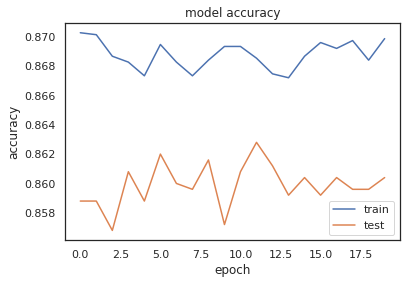

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(an_gd.history['accuracy'])
plt.plot(an_gd.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()



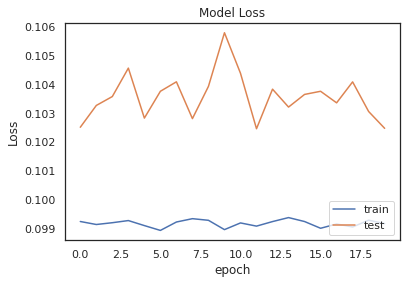

In [ ]:
plt.plot(an_gd.history['loss'])
plt.plot(an_gd.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('Loss')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)


In [ ]:
from sklearn.metrics import confusion_matrix
cm_an=confusion_matrix(y_test, y_pred)
cm_an

array([[1939,   52],
       [ 296,  213]])

In [ ]:
cm_plot_labels = ['No_Churn','Churn']

Confusion matrix, without normalization
[[1939   52]
 [ 296  213]]


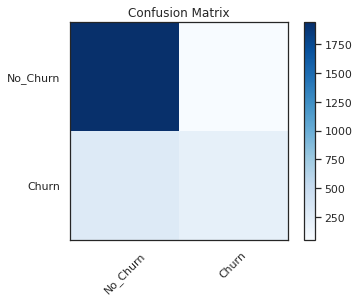

In [ ]:
plot_confusion_matrix(cm=cm_an, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
accuracy=(1939+213)/(1939+213+296+52)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print("Neural network specificity, Precision, Recall(Sensitivity), accuracy are", specificity, Precision, Recall, accuracy)

Neural network specificity, Precision, Recall(Sensitivity), accuracy are 0.9738824711200402 0.8037735849056604 0.41846758349705304 0.8608


In [ ]:
pip install scikit-plot

In [ ]:
y_pred=ann.predict(X_test)
y_pred.T

array([[0.3744051 , 0.2945549 , 0.09190118, ..., 0.21029225, 0.1038081 ,
        0.04461986]], dtype=float32)

In [ ]:
m=ann.predict_proba(X_test)[:]

In [ ]:
# Reference is https://gist.github.com/jaimezorno/00036a53661e441c600e7ca29c995d29

def plot_Lift_curve(y_val, y_pred, step=0.01):
    
    #Define an auxiliar dataframe to plot the curve
    aux_lift = pd.DataFrame()
    #Create a real and predicted column for our new DataFrame and assign values
    aux_lift['real'] = y_val
    aux_lift['predicted'] = y_pred
    #Order the values for the predicted probability column:
    aux_lift.sort_values('predicted',ascending=False,inplace=True)
    
    #Create the values that will go into the X axis of our plot
    x_val = np.arange(step,1+step,step)
    #Calculate the ratio of ones in our data
    ratio_ones = aux_lift['real'].sum() / len(aux_lift)
    #Create an empty vector with the values that will go on the Y axis our our plot
    y_v = []
    
    #Calculate for each x value its correspondent y value
    for x in x_val:
        num_data = int(np.ceil(x*len(aux_lift))) #The ceil function returns the closest integer bigger than our number 
        data_here = aux_lift.iloc[:num_data,:]   # ie. np.ceil(1.4) = 2
        ratio_ones_here = data_here['real'].sum()/len(data_here)
        y_v.append(ratio_ones_here / ratio_ones)
           
   #Plot the figure
    fig, axis = plt.subplots()
    fig.figsize = (40,40)
    axis.plot(x_val, y_v, 'g-', linewidth = 3, markersize = 5)
    axis.plot(x_val, np.ones(len(x_val)), 'k-')
    axis.set_xlabel('Proportion of sample')
    axis.set_ylabel('Lift')
    plt.title('Lift Curve')
    plt.show()


## Lift Curve

### For, lift curve, I tried to use scikit plot but it doesn't work.  Although I tried reshaping and transposes the array matrix. So I used a function(as above) to perform this. Lift is a measure of the effectiveness of a predictive model calculated as the ratio between the results obtained with and without the predictive model. The greater the area between the lift curve and the baseline, the better the model. The lift chart shows how much more likely we are to receive respondents than if we contact a random sample of customers. By contacting only 10% of customers based on the predictive model we will reach 5 times as many respondents as if we use no model. 

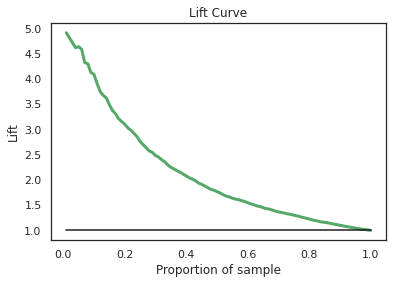

In [ ]:
plot_Lift_curve(y_test, y_pred)

## Comparison

### Just due to curiosity, I compared the neural network model with the other classification models. For comparison of the neural network model, I used the Logistic regression, Naive Bayes and KNN. From these I got given results and confusion matrix.

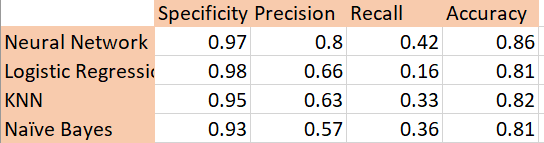


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
classifier_LR=LogisticRegression(random_state=0)
classifier_LR.fit(X_train, y_train)
y_pred_LR=classifier_LR.predict(X_test)
cm_LR=confusion_matrix(y_test, y_pred_LR)

accuracy=(1950+79)/(1950+79+41+430)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_LR).ravel()
specificity = tn / (tn+fp)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print("Logistic Regression specificity, Precision, Recall(Sensitivity), accuracy are", specificity, Precision, Recall, accuracy)
cm_LR

Logistic Regression specificity, Precision, Recall(Sensitivity), accuracy are 0.9794073329984933 0.6583333333333333 0.15520628683693516 0.8116


array([[1950,   41],
       [ 430,   79]])

In [65]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn=KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
classifier_knn.fit(X_train, y_train)
y_pred_knn=classifier_knn.predict(X_test)
accuracy=(1890+170)/(1890+170+101+339)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
specificity = tn / (tn+fp)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print("K Nearest Neighbor, specificity, Precision, Recall(Sensitivity), accuracy are", specificity, Precision, Recall, accuracy)

K Nearest Neighbor, specificity, Precision, Recall(Sensitivity), accuracy are 0.9492717227523857 0.6273062730627307 0.33398821218074654 0.824


In [19]:
cm_knn=confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[1890,  101],
       [ 339,  170]])

In [67]:
from sklearn.naive_bayes import GaussianNB
classifier_NB=GaussianNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB=classifier_NB.predict(X_test)
accuracy=(1850+185)/(1850+185+141+324)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_NB).ravel()
specificity = tn / (tn+fp)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print("Naive Bayes specificity, Precision, Recall(Sensitivity), accuracy are", specificity, Precision, Recall, accuracy)

Naive Bayes specificity, Precision, Recall(Sensitivity), accuracy are 0.9291813159216474 0.5674846625766872 0.36345776031434185 0.814


In [21]:
cm_NB=confusion_matrix(y_test, y_pred_NB)
cm_NB

array([[1850,  141],
       [ 324,  185]])

In [74]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
classifiers = [LogisticRegression(random_state=0 ), 
               GaussianNB(),
               KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2),
               ]
for c in classifiers:
    c.fit(X_train, y_train)

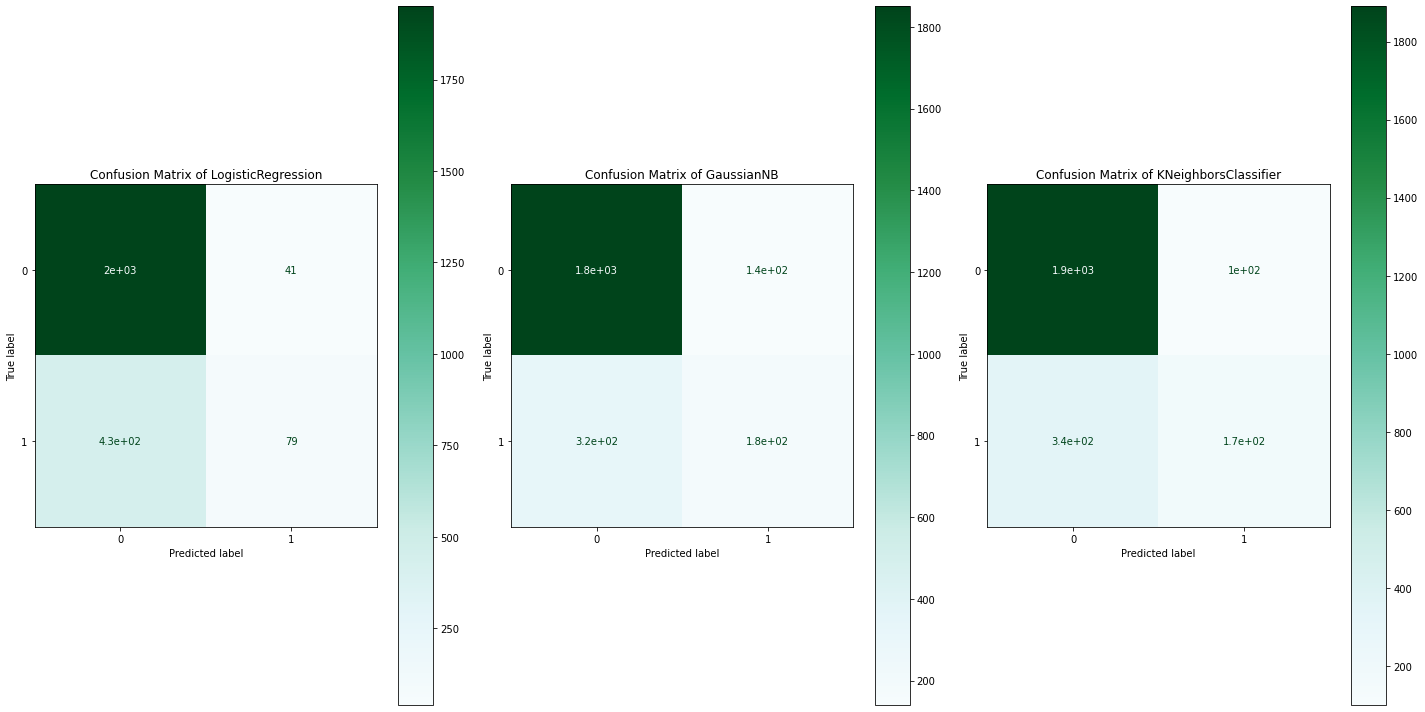

In [100]:
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
font.set_style('italic')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,10))

for c, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(c, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='BuGn' )
    ax.title.set_text("Confusion Matrix of "+type(c).__name__)

plt.tight_layout()  
plt.show()

## CONCLUSION

### In this, I used neural networking with tensorflow, keras libraries. I used different hyperparameters like different optimizers, different values of learning rate, different activation function etc. I got 0.87 accuracy of the best model. I validated the model by test set and plotted lift curve too. I also made confusion matrix to better grasp the values.

 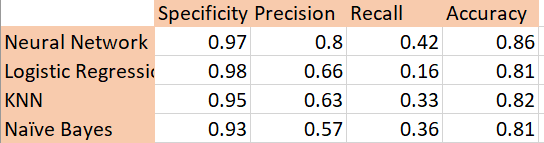

 Just out of curiosity, I compared neural netwoking model with other classification models and found these values. We can see accuracy is best of neural network model. Also Precision and Recall of other models are not good. 